In [164]:
# packages for data processing
import pandas as pd
import numpy as np
#packages for modelling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
#packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [165]:
df=pd.read_csv('/content/drive/MyDrive/cognorise internship/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [166]:
warnings.filterwarnings('ignore')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [168]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [169]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [170]:
df.shape

(569, 33)

In [171]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [172]:
df.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [173]:
df.describe(include="object")

,diagnosis
count,569
unique,2
top,B
freq,357


In [174]:
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

<function matplotlib.pyplot.show(close=None, block=None)>

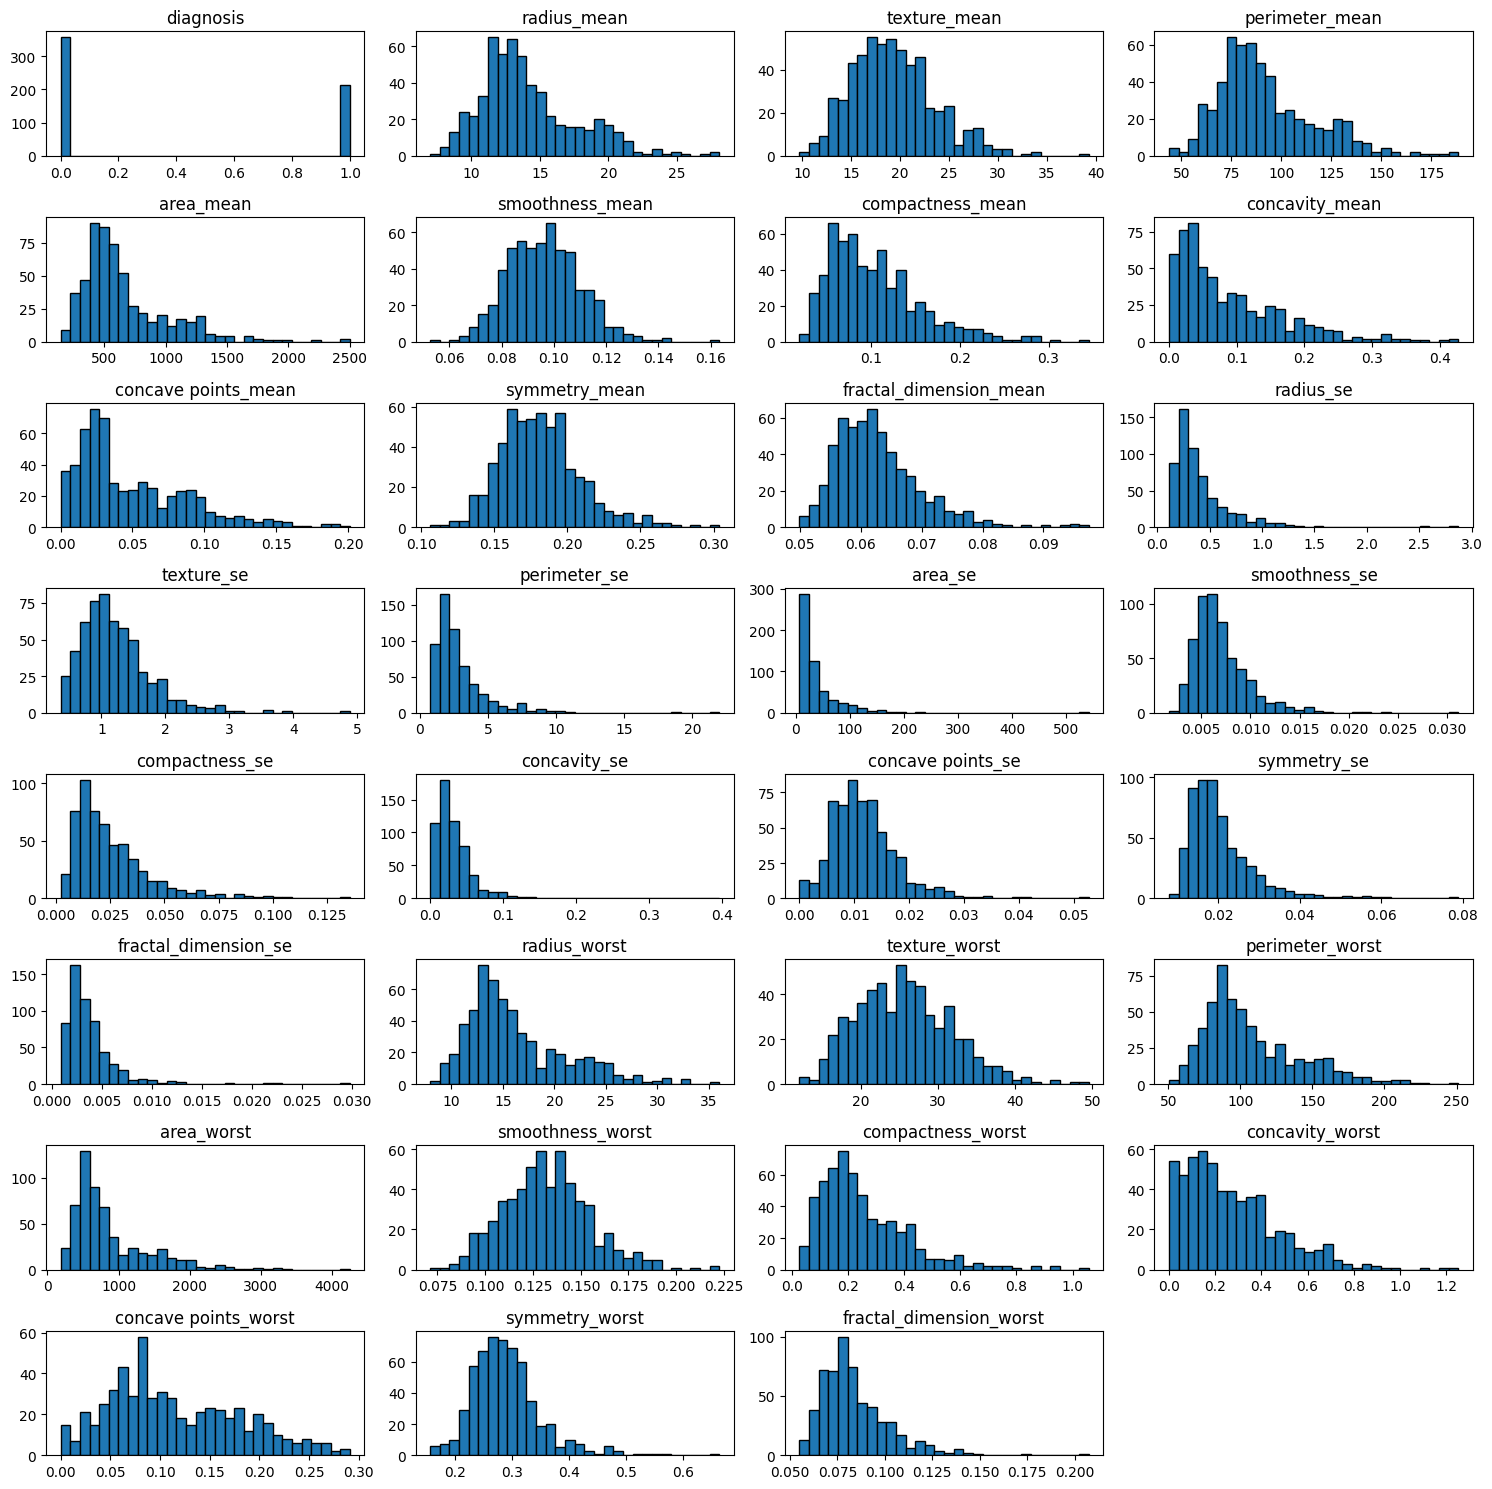

In [175]:
rows=8
cols=4
plt.figure(figsize=(15,15))
for i,column in enumerate(df.columns[:31],1):
  plt.subplot(rows,cols,i)
  plt.hist(df[column],bins=30,edgecolor='Black')
  plt.title(column)
plt.tight_layout()
plt.show

In [176]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


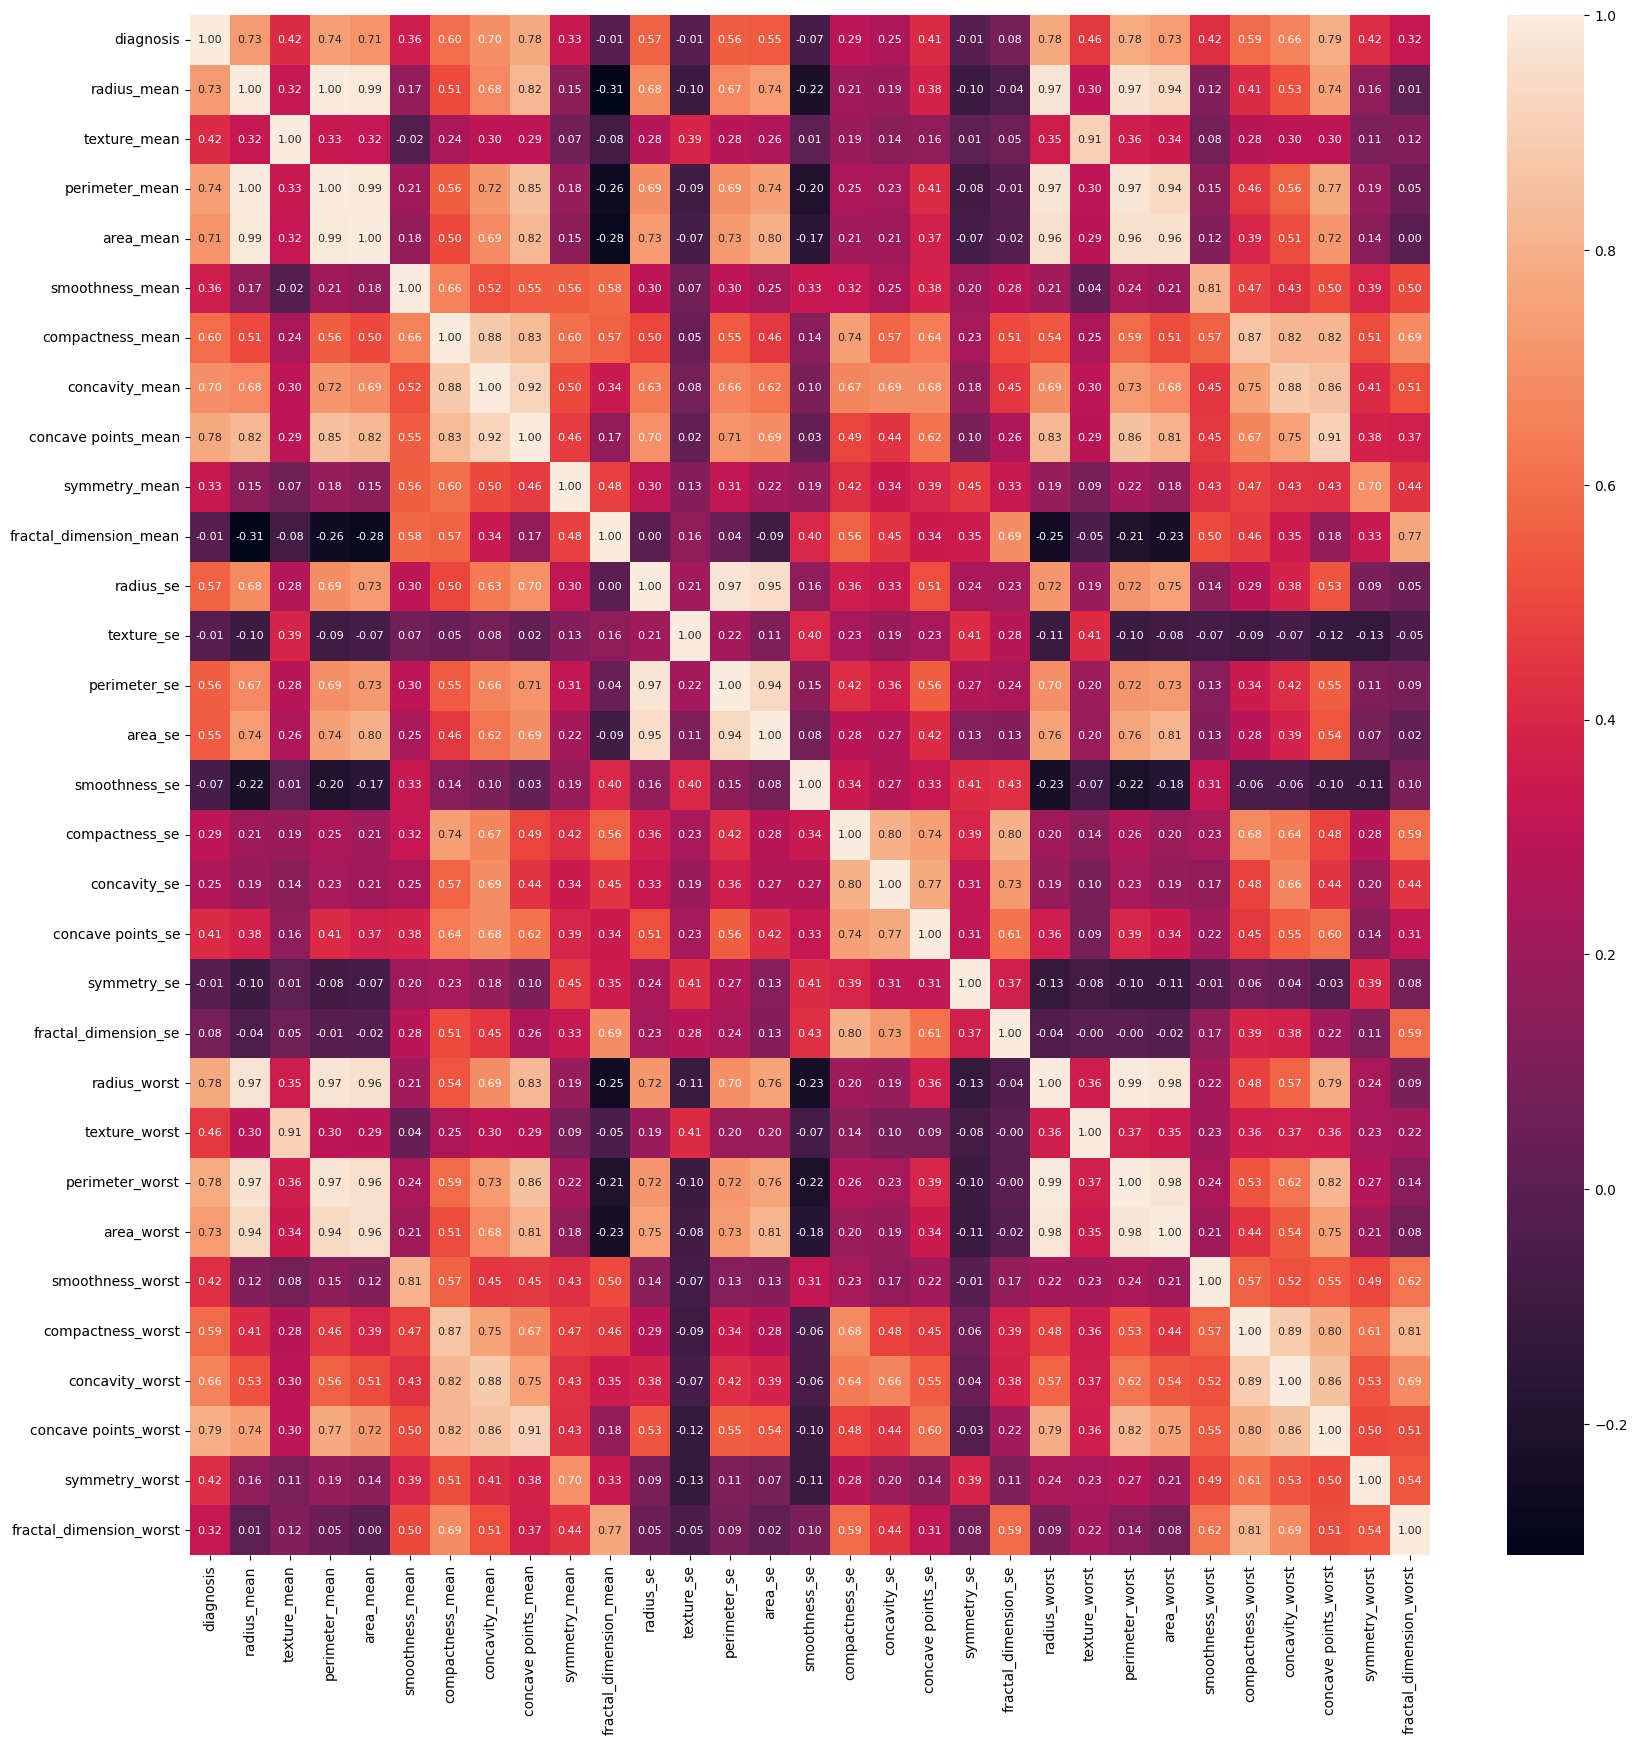

In [177]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f',annot_kws={"size":8})
plt.show()

In [178]:
X=df.iloc[:,1:]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [179]:
y=df.iloc[:,0]
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [180]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [181]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=1,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [182]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy score : 0.9532163742690059
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



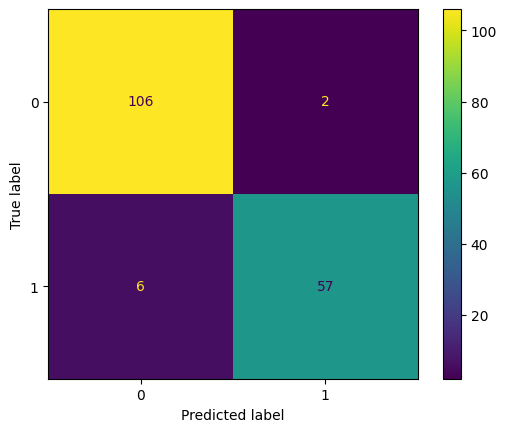

In [183]:
y_pred_knn=knn.predict(X_test)
print("Accuracy score :",accuracy_score(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

In [184]:
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


Accuracy score : 0.9590643274853801
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



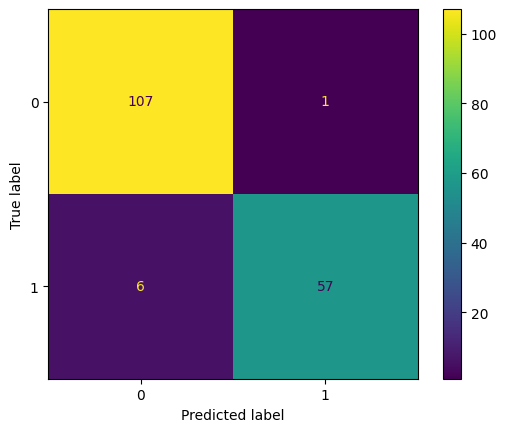

In [185]:
knn1=KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
knn1.fit(X_train,y_train)
y_pred_knn1=knn1.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_knn1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn1))
print(classification_report(y_test,y_pred_knn1))

In [186]:
rfc=RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Accuracy score : 0.9532163742690059
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



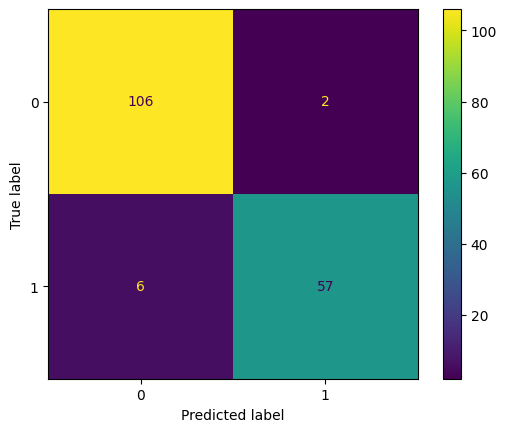

In [187]:
y_pred_rfc=rfc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

In [188]:
paramsrfc={'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'max_depth':[3,5,7,9]}
clfrfc=GridSearchCV(rfc,paramsrfc,cv=10,scoring='accuracy')
clfrfc.fit(X_train,y_train)
print(clfrfc.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}


Accuracy score : 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



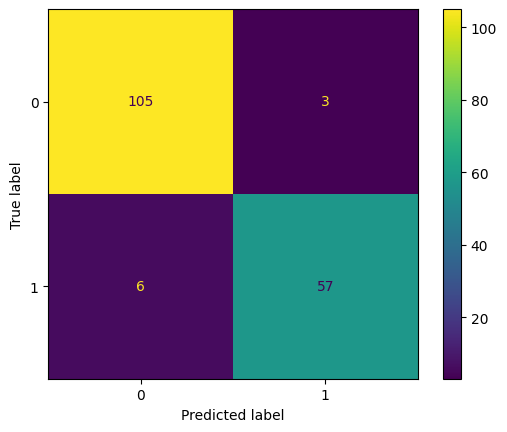

In [189]:
rfc1=RandomForestClassifier(random_state=1,criterion='gini',max_depth=7,n_estimators=100)
rfc1.fit(X_train,y_train)
y_pred_rfc1=rfc1.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_rfc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc1))
print(classification_report(y_test,y_pred_rfc1))

In [190]:
dtc=DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Accuracy score : 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       108
           1       1.00      0.81      0.89        63

    accuracy                           0.93       171
   macro avg       0.95      0.90      0.92       171
weighted avg       0.94      0.93      0.93       171



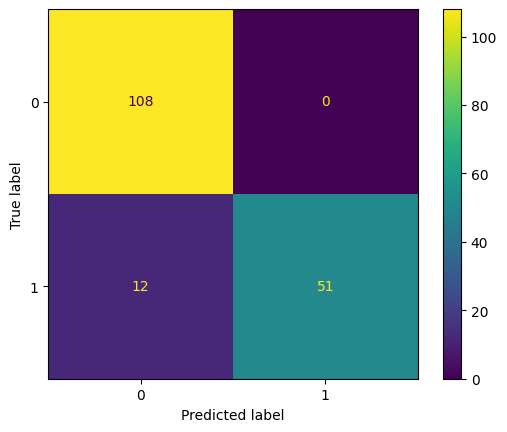

In [191]:
y_pred_dtc=dtc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))

In [192]:
paramsdtc={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[3,4,5,6,7],'min_samples_split':[2,3]}
clfdtc=GridSearchCV(dtc,paramsdtc,cv=10,scoring='accuracy')
clfdtc.fit(X_train,y_train)
print(clfdtc.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


In [193]:
dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=6,min_samples_split=2,splitter='best')
dtc1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

Accuracy score : 0.9122807017543859
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       108
           1       0.89      0.87      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



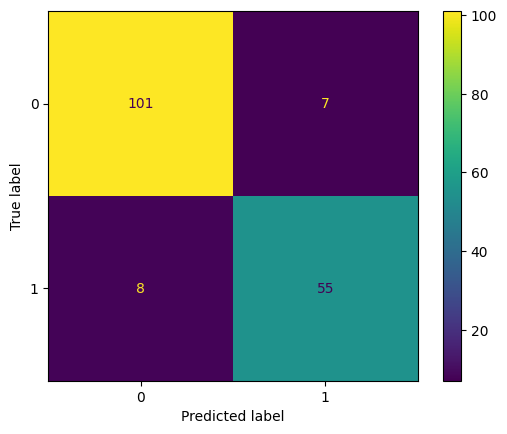

In [194]:
y_pred_dtc1=dtc1.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_dtc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc1))
print(classification_report(y_test,y_pred_dtc1))

In [195]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Accuracy score : 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       108
           1       1.00      0.81      0.89        63

    accuracy                           0.93       171
   macro avg       0.95      0.90      0.92       171
weighted avg       0.94      0.93      0.93       171



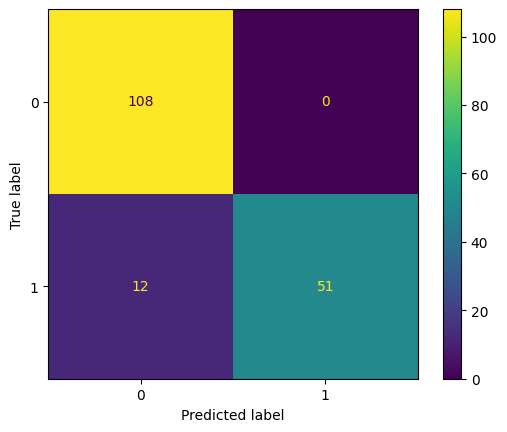

In [196]:
y_pred_lr=dtc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_lr))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

In [197]:
lrn=LinearRegression()
lrn.fit(X_train,y_train)

LinearRegression()

In [198]:
y_pred_lrn = np.where(y_pred_lrn>= 0.5, 1, 0)
y_pred_lrn

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [199]:
print('Accuracy score :',accuracy_score(y_test,y_pred_lrn))

Accuracy score : 0.9532163742690059


In [200]:
classifier_names=['KNN classifier','RandomForest Classifier','DecisionTree Classifier','Logistic Regression','Linear Regression']
predictions=[y_pred_knn1,y_pred_rfc,y_pred_dtc,y_pred_lr,y_pred_lrn]
for name,pred in zip(classifier_names,predictions):
  acc=accuracy_score(y_test,pred)
  print(f"Accuracy score of {name}:{acc}")

Accuracy score of KNN classifier:0.9590643274853801
Accuracy score of RandomForest Classifier:0.9532163742690059
Accuracy score of DecisionTree Classifier:0.9298245614035088
Accuracy score of Logistic Regression:0.9298245614035088
Accuracy score of Linear Regression:0.9532163742690059
